# Multiclass Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data is already split into training and testing subsets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Show first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

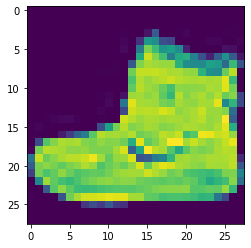

In [4]:
# Plot first training sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [5]:
# List of actual classes

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

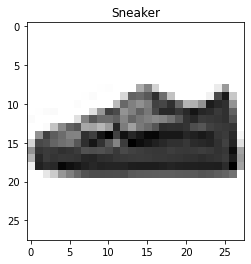

In [6]:
# Plot an example image and its label
index_of_choice = 108
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

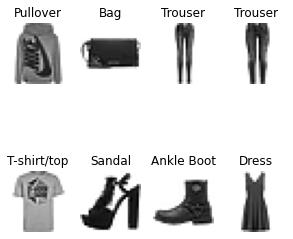

In [7]:
# Random 4 images from the training dataset
import random

plt.figure(figsize=(5, 5))

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Model 1

In [8]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model - Sparse Categorical Crossentropy
model_mc1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.3213 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.0952 - val_loss: 2.3026 - val_accuracy

In [9]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [10]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 2.1785 - accuracy: 0.3000 - val_loss: 1.6517 - val_accuracy: 0.4072
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4217 - accuracy: 0.4396 - val_loss: 1.3033 - val_accuracy: 0.4831
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2375 - accuracy: 0.4926 - val_loss: 1.2633 - val_accuracy: 0.5030
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1943 - accuracy: 0.5151 - val_loss: 1.1801 - val_accuracy: 0.5228
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1180 - accuracy: 0.5396 - val_loss: 1.1811 - val_accuracy: 0.5370
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0715 - accuracy: 0.5702 - val_loss: 1.0300 - val_accuracy: 0.5944
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9970 - accuracy: 0.6028 - val_loss: 0.9642 - val_accuracy

In [11]:
# Model summary
model_mc1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Checking min/max values
train_data.min(), train_data.max()

(0, 255)

In [13]:
# Normalise the data in the interval 0 to 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [14]:
# Checking normalised min/max values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Create a model
model_mc2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc2 = model_mc2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0651 - accuracy: 0.6242 - val_loss: 0.7602 - val_accuracy: 0.7422
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6897 - accuracy: 0.7651 - val_loss: 0.6792 - val_accuracy: 0.7681
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6353 - accuracy: 0.7781 - val_loss: 0.6409 - val_accuracy: 0.7812
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6041 - accuracy: 0.7888 - val_loss: 0.6387 - val_accuracy: 0.7763
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5836 - accuracy: 0.7927 - val_loss: 0.6043 - val_accuracy: 0.7896
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5677 - accuracy: 0.7994 - val_loss: 0.5957 - val_accuracy: 0.7933
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5536 - accuracy: 0.8042 - val_loss: 0.5815 - val_accuracy:

<AxesSubplot:title={'center':'Normalised data'}>

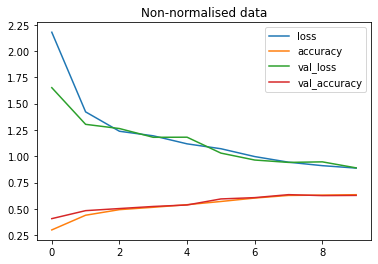

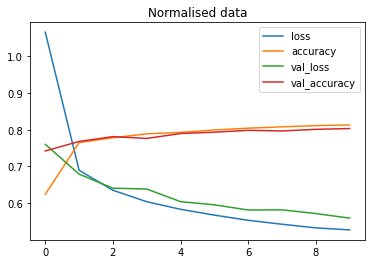

In [16]:
import pandas as pd

# Plot curves
pd.DataFrame(history_mc1.history).plot(title="Non-normalised data")
pd.DataFrame(history_mc2.history).plot(title="Normalised data")

## Finding ideal learning rate

In [18]:
# Create a model
model_mc3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile a model
model_mc3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_mc3 = model_mc3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1124 - accuracy: 0.6118 - val_loss: 0.7620 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6814 - accuracy: 0.7696 - val_loss: 0.6613 - val_accuracy: 0.7746 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6164 - accuracy: 0.7927 - val_loss: 0.6206 - val_accuracy: 0.7912 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5828 - accuracy: 0.8040 - val_loss: 0.6074 - val_accuracy: 0.7969 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5678 - accuracy: 0.8086 - val_loss: 0.5925 - val_accuracy: 0.7998 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5605 - accuracy: 0.8104 - val_loss: 0.5965 - val_accuracy: 0.7975 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 9s

Text(0.5, 1.0, 'Finding the best learning rate')

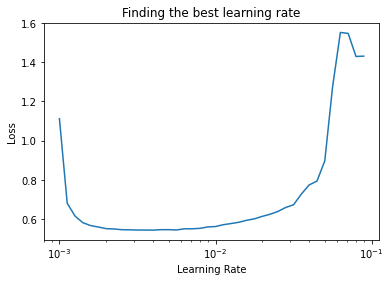

In [20]:
# Plot the learning rate curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_mc3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

Ideal learning rate seems to be at around 1e-3, i.e. 0.001

In [22]:
# Creating a model with ideal learning rate
model_mc4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history_mc4 = model_mc4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0011 - accuracy: 0.6239 - val_loss: 0.7089 - val_accuracy: 0.7236
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6388 - accuracy: 0.7602 - val_loss: 0.6295 - val_accuracy: 0.7560
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5901 - accuracy: 0.7736 - val_loss: 0.5992 - val_accuracy: 0.7672
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5582 - accuracy: 0.7918 - val_loss: 0.5809 - val_accuracy: 0.7938
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5307 - accuracy: 0.8139 - val_loss: 0.5605 - val_accuracy: 0.8056
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5164 - accuracy: 0.8203 - val_loss: 0.5459 - val_accuracy: 0.8098
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5065 - accuracy: 0.8225 - val_loss: 0.5459 - val_accura